In [2]:
# DEPENDENCIES
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Addition needed for statistical analysis
import scipy.stats as st


In [3]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

# Addition inspect
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine('sqlite:///../Resources/hawaii.sqlite')

In [6]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()

# reflect the tables
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Session link to check columns with inspector
inspector = inspect(engine)


In [9]:
# check columns and datatypes for measurements table
measures_columns = inspector.get_columns('measurement')
for column in measures_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# # check columns and datatypes for station table
stations_columns = inspector.get_columns('station')
for column in stations_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
# Check records are there
for row in session.query(measurement.id, measurement.station).limit(10).all():
    print(row)

(1, 'USC00519397')
(2, 'USC00519397')
(3, 'USC00519397')
(4, 'USC00519397')
(5, 'USC00519397')
(6, 'USC00519397')
(7, 'USC00519397')
(8, 'USC00519397')
(9, 'USC00519397')
(10, 'USC00519397')


In [14]:
# check measurements table content and fields
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d6deef5ca0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [15]:
# check station table content and fields
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d6deef5040>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.

# We do a query in database and extract date of first record after sorting (first in the descending order list)
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
most_recent_date


'2017-08-23'

In [17]:
# as this date is just an string, we convert it with datetime to a date year-month-day format
most_recent_date = (dt.datetime.strptime(most_recent_date, "%Y-%m-%d")).date()
most_recent_date

datetime.date(2017, 8, 23)

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database that we have in previous df
# Calculate the date one year from the last date in data set by substracting with timedelta function of datetime
query_date = most_recent_date - dt.timedelta(days=365)
# query_date

# Perform a query to list dates and precipitation scores for that year >= 1 year ago till final record
precip = session.query(measurement.date, measurement.prcp).filter(measurement.date >= query_date).\
       group_by(measurement.date).all()
precip

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [32]:
# Save the query results as a Pandas DataFrame
precip_df = pd.DataFrame(precip)
precip_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [33]:
#  set the index to the date column
precip_df = precip_df.set_index("date")
precip_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [34]:
# Sort the dataframe by date.
precip_df = precip_df.sort_values(by=['date'])
precip_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


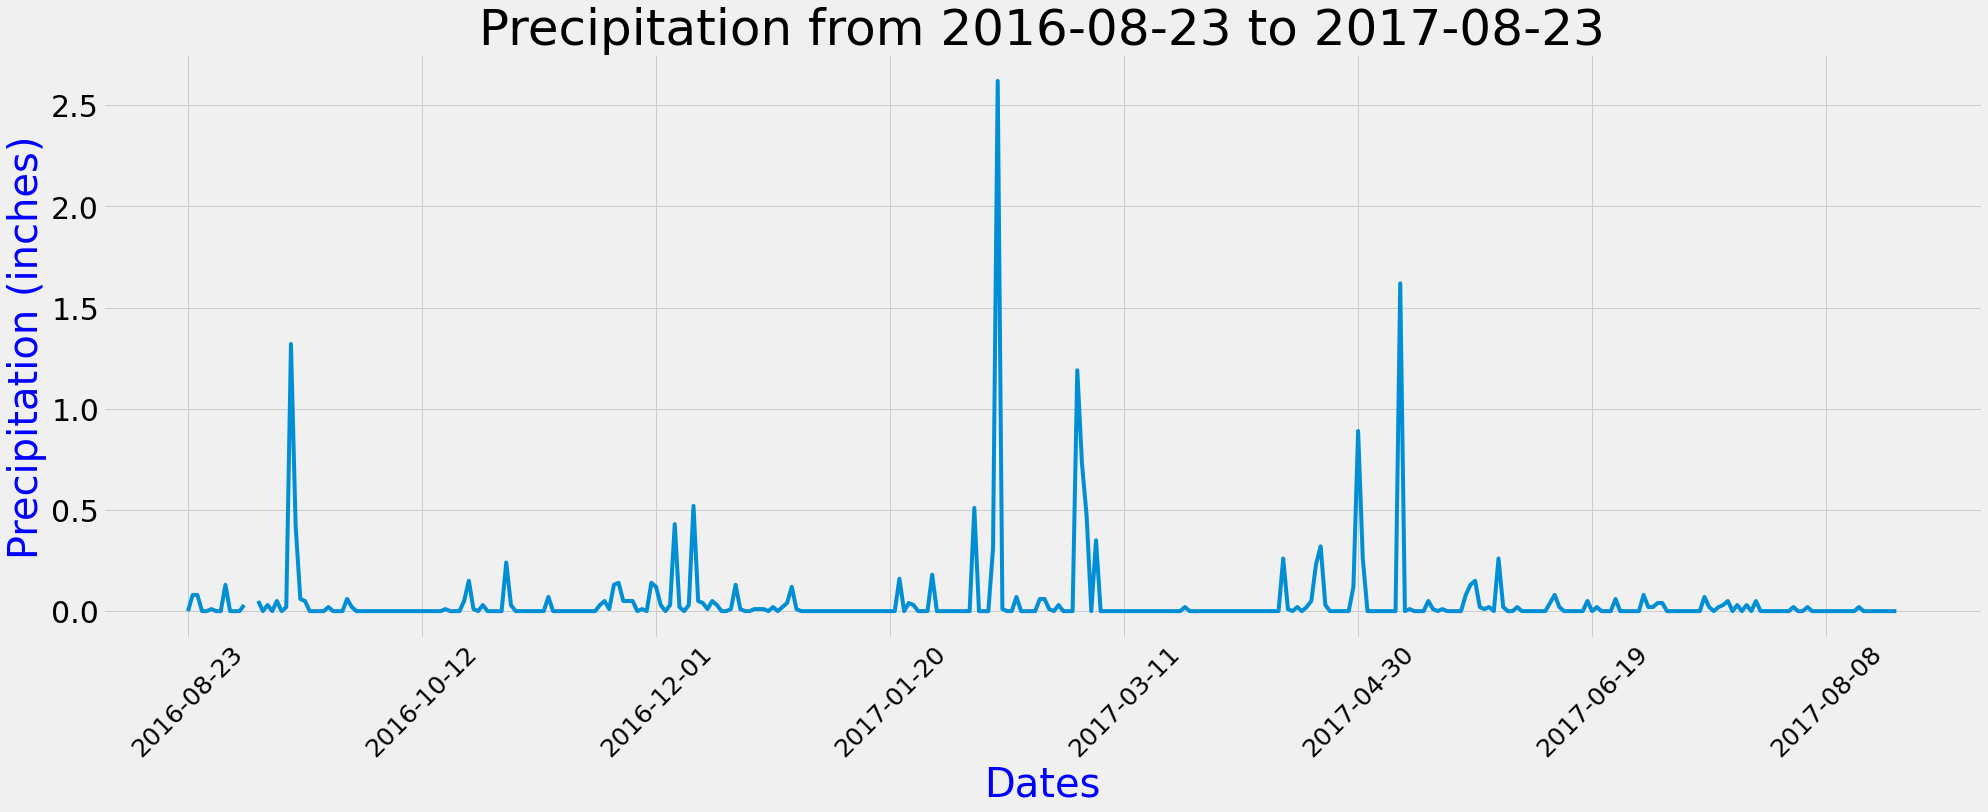

In [35]:
# Use Pandas Plotting with Matplotlib to plot the data

# BEFORE set figure size to adjust for space
precip_df.plot(figsize=(30,10), fontsize =30, legend=None)

# Set plot title.
plt.title(f"Precipitation from {query_date} to {most_recent_date}", fontsize = 50)
plt.xlabel('Dates', fontsize =40, color ='b')
plt.ylabel("Precipitation (inches)", fontsize =40, color ='b')
# set font and rotation for date tick labels
plt.xticks(rotation=45, fontsize =25)

#Save graph. Added bbox after finding out in documentation that it is a remedy whe savefig cuts off the image
plt.savefig("images/Precipitation", bbox_inches='tight')

#Show graph.

plt.show()


In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,364.00
mean,0.05
std,0.20
min,0.00
25%,0.00
50%,0.00
75%,0.02
max,2.62


# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number stations in the dataset, just counting them
stations_count = session.query(station).count()
print(f"There are {stations_count} stations in this sample")

There are 9 stations in this sample


In [38]:
# Design a query to find the most active stations. The ones that appear more in observations so have more rows in table
# List the stations and the counts in descending order.
activity_by_station = session.query(measurement.station, func.count(measurement.station)).\
order_by(func.count(measurement.station).desc()).group_by(measurement.station).all()
activity_by_station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# most active one, take 1st row
most_active = activity_by_station[0]
most_active
# take first field of 1st row [0][0] which is the station id
print(f"The most active station in this sample is {activity_by_station[0][0]}")
# print 2nd field of 1st row [0][1] which is the count, check above results
print(f"with a total of {activity_by_station[0][1]} counts")

The most active station in this sample is USC00519281
with a total of 2772 counts


In [27]:
# Using the most active station id from the previous query, 
most_active_station = activity_by_station[0][0]

# calculate the lowest or MINIMUM temperature (in most active station)
lowest_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == most_active_station).scalar()           
print(f"Lowest temperature: {lowest_temp} degrees F.")

# highest or MAXIMUM temperature (in most active station)
highest_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == most_active_station).scalar()
print(f"Highest temperature: {highest_temp} degrees F.")

# and AVERAGE temperature (in most active station). Rounded 2 decimals
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active_station).scalar()
print(f"Average temperature: {round(avg_temp, 2)} degrees F.")

Lowest temperature: 54.0 degrees F.
Highest temperature: 85.0 degrees F.
Average temperature: 71.66 degrees F.


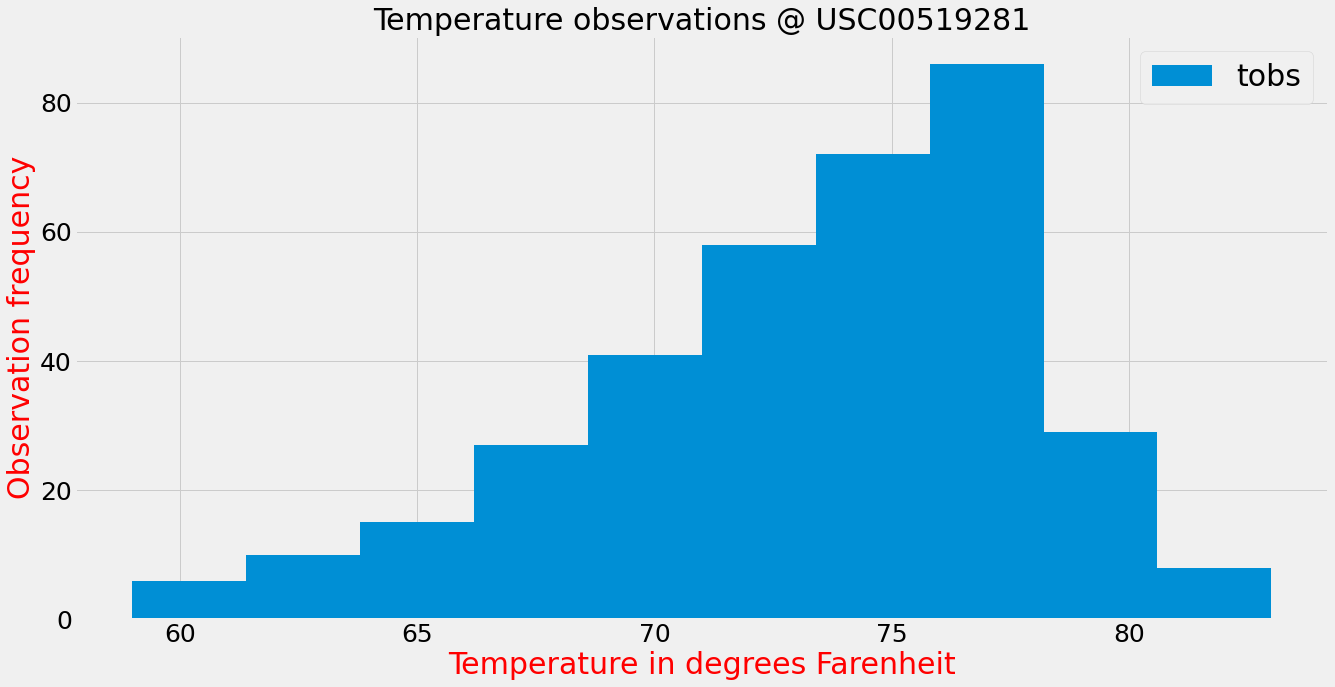

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temp_df = pd.DataFrame(session.query(measurement.tobs).filter((measurement.station == most_active_station)\
                                        & (measurement.date >= query_date)\
                                        & (measurement.date <= most_recent_date)).all())

# most_active_temp_df.plot(kind="hist", figsize=(20,10), fontsize =30, legend=None)
most_active_temp_df.plot(kind="hist", figsize=(20,10), fontsize =30)

plt.xlabel("Temperature in degrees Farenheit", fontsize=30, color='r')
plt.ylabel("Observation frequency", fontsize=30, color='r')
plt.legend(loc=1, fontsize=20, prop={'size': 30})

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.title(f"Temperature observations @ {most_active_station}", fontsize=30)

# plt.tight_layout()
plt.savefig("images/temperature observations.png", bbox_inches='tight')
plt.show()

# Close session

In [28]:
# Close Session
session.close()